In [17]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['image.cmap'] = 'inferno'

# S-dataset

In [18]:
from sklearn.cluster import MeanShift

def cluster_S(dataset_path, dataset_name, bandwidth=80000):
# https://towardsdatascience.com/machine-learning-algorithms-part-13-mean-shift-clustering-example-in-python-4d6452720b00
    cluster_data = {}
    sim_data_names = [dataset_name]
    raw_data = pd.read_csv(dataset_path+dataset_name, sep='\t',header=None)
    centroids = pd.read_csv(dataset_path+dataset_name+'_centroids', sep='\t',header=None)
#     print('Original clusters with centroids')
#     plt.scatter(raw_data.loc[:,0], raw_data.loc[:,1], s=2, c=[(0,0,0)], alpha=0.1)
#     plt.scatter(centroids.loc[:,0], centroids.loc[:,1],s=20, c='#ff0000')
#     plt.show()
    # bandwidth : float, optional
    # Bandwidth used in the RBF kernel.
    # If not given, the bandwidth is estimated using sklearn.cluster.estimate_bandwidth; see the documentation for that function for hints on scalability (see also the Notes, below).
    # seeds : array, shape=[n_samples, n_features], optional
    # Seeds used to initialize kernels. If not set, the seeds are calculated by clustering.get_bin_seeds with bandwidth as the grid size and default values for other parameters.
    # bin_seeding : boolean, optional
    # If true, initial kernel locations are not locations of all points, but rather the location of the discretized version of points, where points are binned onto a grid whose coarseness corresponds to the bandwidth. Setting this option to True will speed up the algorithm because fewer seeds will be initialized. default value: False Ignored if seeds argument is not None.
    # min_bin_freq : int, optional
    # To speed up the algorithm, accept only those bins with at least min_bin_freq points as seeds. If not defined, set to 1.
    # cluster_all : boolean, default True
    # If true, then all points are clustered, even those orphans that are not within any kernel. Orphans are assigned to the nearest kernel. If false, then orphans are given cluster label -1.
    # n_jobs : int or None, optional (default=None)
    # The number of jobs to use for the computation. This works by computing each of the n_init runs in parallel.
    ms = MeanShift(bandwidth=bandwidth)
    ms.fit(raw_data)
    ms_cluster_centers = ms.cluster_centers_
    print('Found clusters with meanshift algorithm')
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(raw_data.loc[:,0], raw_data.loc[:,1], s=2, c=[(0,0,0)], alpha=0.1, label = None)
    ax.scatter(ms_cluster_centers[:,0], ms_cluster_centers[:,1], marker='v', 
               color='blue', s=10, linewidth=5, zorder=10, alpha=0.3, label='Meanshift centroids')
    ax.scatter(centroids.loc[:,0], centroids.loc[:,1], s=20, c='#ff0000', label='Ground truth')
    ax.legend()
    plt.show()
    print("Number of found clusters: ", ms_cluster_centers.shape[0])
    print("Proposed number of clusters: ", centroids.shape[0])
    

Found clusters with meanshift algorithm


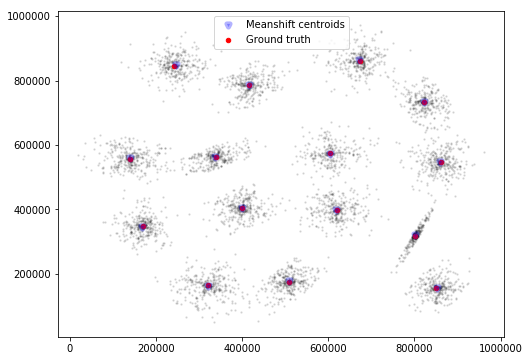

Number of found clusters:  15
Proposed number of clusters:  15


In [19]:
cluster_S('data/s-originals/', 's1')

Found clusters with meanshift algorithm


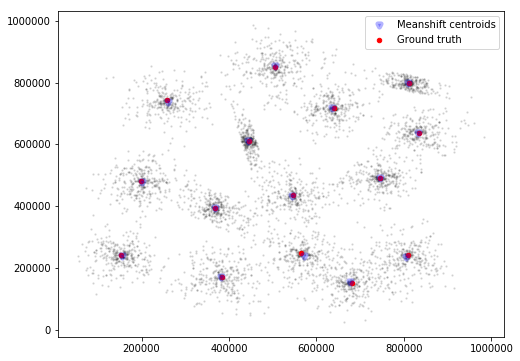

Number of found clusters:  15
Proposed number of clusters:  15


In [20]:
cluster_S('data/s-originals/', 's2')

Found clusters with meanshift algorithm


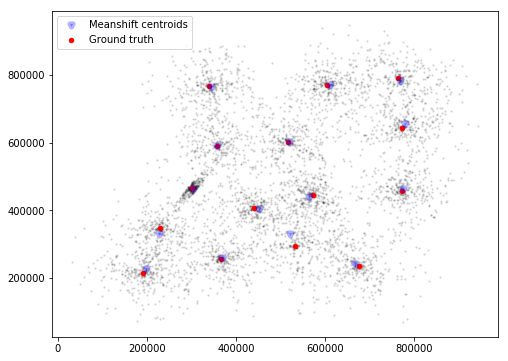

Number of found clusters:  15
Proposed number of clusters:  15


In [21]:
cluster_S('data/s-originals/', 's3')

Found clusters with meanshift algorithm


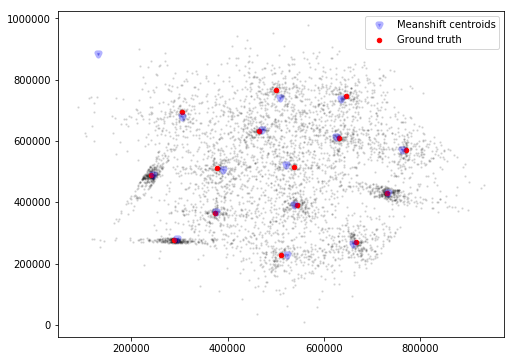

Number of found clusters:  16
Proposed number of clusters:  15


In [22]:
cluster_S('data/s-originals/', 's4')

# G2-dataset

In [23]:
def cluster_G2(dataset_path, dataset_name, bandwidth=None):
# https://towardsdatascience.com/machine-learning-algorithms-part-13-mean-shift-clustering-example-in-python-4d6452720b00
    cluster_data = {}
    sim_data_names = [dataset_name]
    raw_data = pd.read_csv(dataset_path+dataset_name, sep='     ', header=None)
    
    ms = MeanShift(bandwidth=bandwidth)
    ms.fit(raw_data)
    
    ms_cluster_centers = ms.cluster_centers_
    print('Found clusters with meanshift algorithm')
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(raw_data.loc[:,0], raw_data.loc[:,1], s=2, c=[(0,0,0)], alpha=0.1, label = None)
    ax.scatter(ms_cluster_centers[:,0], ms_cluster_centers[:,1], marker='v', 
               color='blue', s=10, linewidth=5, zorder=10, alpha=0.3, label='Meanshift centroids')
    ax.legend()
    plt.show()
    print("Number of found clusters: ", ms_cluster_centers.shape[0])

/Users/yevhenp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


Found clusters with meanshift algorithm


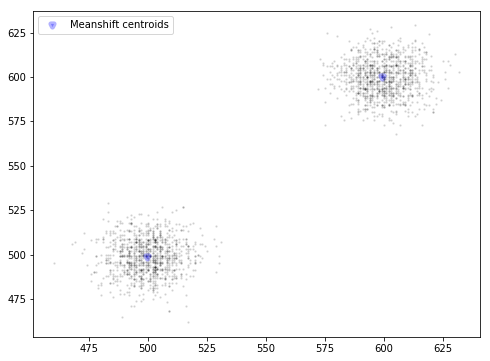

Number of found clusters:  2


In [24]:
cluster_G2(dataset_path = 'data/g2-txt/', dataset_name = 'g2-2-10.txt')

/Users/yevhenp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


Found clusters with meanshift algorithm


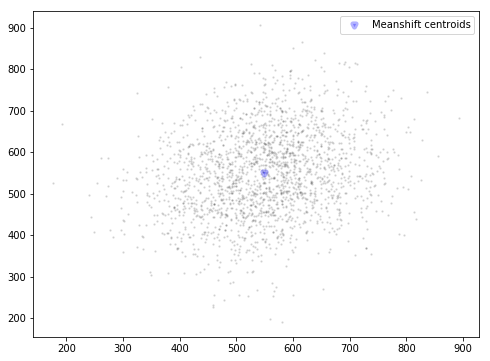

Number of found clusters:  1


In [25]:
cluster_G2(dataset_path = 'data/g2-txt/', dataset_name = 'g2-32-90.txt')

/Users/yevhenp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


Found clusters with meanshift algorithm


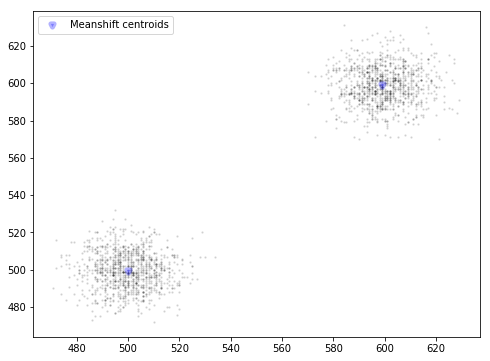

Number of found clusters:  2


In [26]:
cluster_G2(dataset_path = 'data/g2-txt/', dataset_name = 'g2-4-10.txt')

/Users/yevhenp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


Found clusters with meanshift algorithm


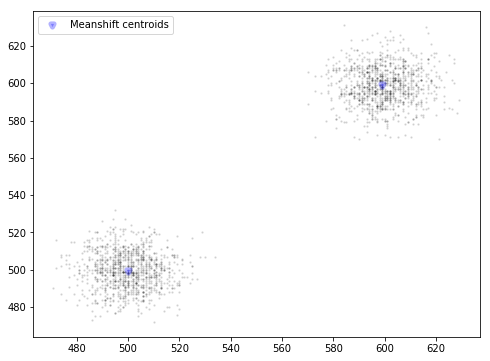

Number of found clusters:  2


In [27]:
cluster_G2(dataset_path = 'data/g2-txt/', dataset_name = 'g2-4-10.txt')